<a href="https://colab.research.google.com/github/deepthi2302/Resume/blob/main/Copy_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 6s 0us/step


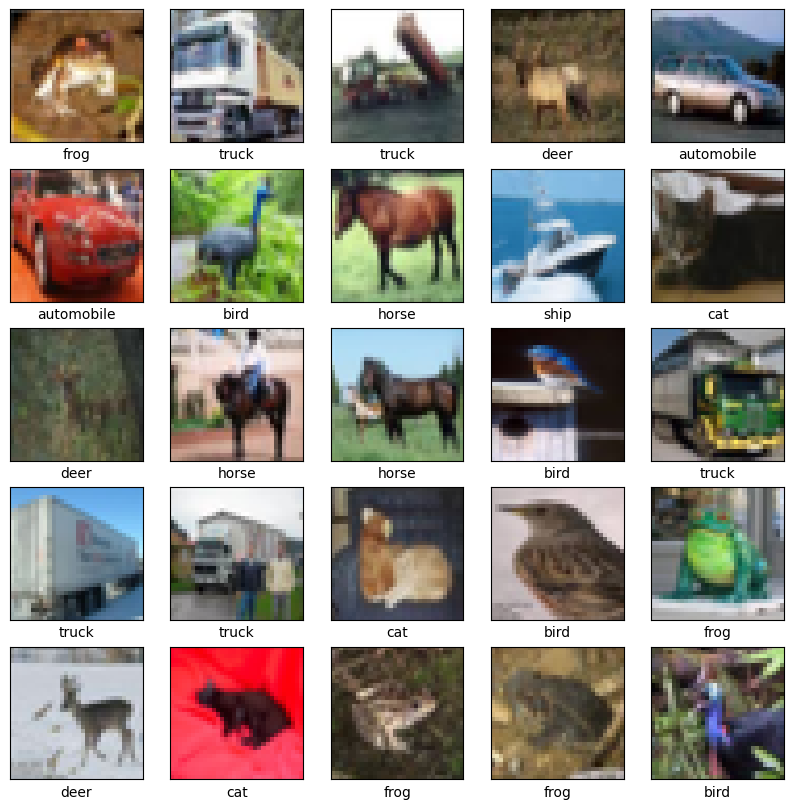

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4906 - accuracy: 0.4578 - val_loss: 1.1948 - val_accuracy: 0.5773
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1202 - accuracy: 0.6047 - val_loss: 1.0702 - val_accuracy: 0.6220
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9683 - accuracy: 0.6584 - val_loss: 1.0355 - val_accuracy: 0.6451
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8694 - accuracy: 0.6964 - val_loss: 0.9685 - val_accuracy: 0.6660
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7949 - accuracy: 0.7217 - val_loss: 0.8936 - val_accuracy: 0.6952
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7400 - accuracy: 0.7403 - val_loss: 0.8801 - val_accuracy: 0.7024
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6874 - accuracy: 0.7583 - val_loss: 0.8750 -

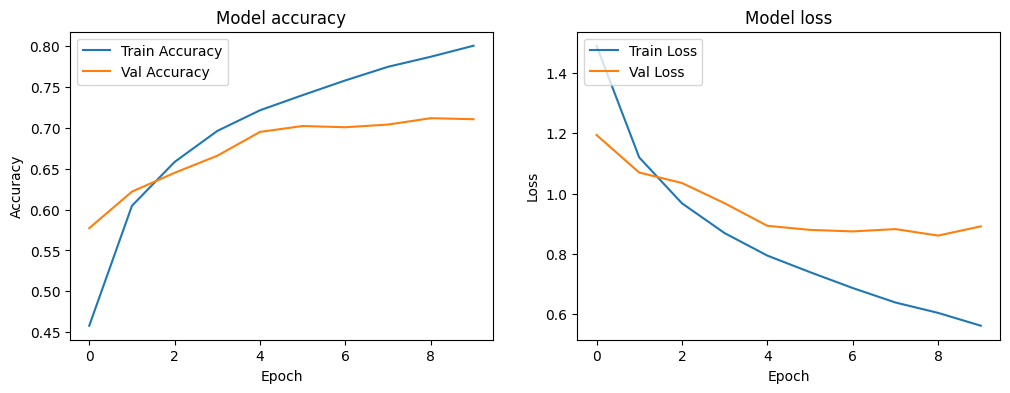

313/313 - 5s - loss: 0.8918 - accuracy: 0.7107 - 5s/epoch - 16ms/step

Test accuracy: 0.7106999754905701
313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

    airplane       0.78      0.72      0.75      1000
  automobile       0.80      0.84      0.82      1000
        bird       0.69      0.52      0.60      1000
         cat       0.55      0.44      0.49      1000
        deer       0.64      0.70      0.67      1000
         dog       0.61      0.63      0.62      1000
        frog       0.71      0.83      0.77      1000
       horse       0.74      0.74      0.74      1000
        ship       0.79      0.85      0.82      1000
       truck       0.74      0.83      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report

# Load and preprocess the dataset (example using CIFAR-10)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display some sample images from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

plot_sample_images(train_images, train_labels, class_names)

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Specify input shape and number of classes
input_shape = train_images.shape[1:]
num_classes = 10  # CIFAR-10 has 10 classes

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Generate a classification report
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
print(classification_report(test_labels, predicted_labels, target_names=class_names))
